tensorflow를 이용하여 multi variable linear regression 문제를 풀어봅니다.

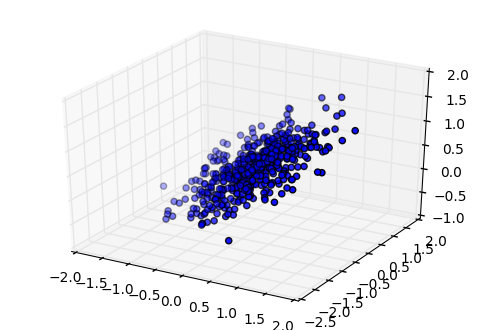

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

num_points = 500

# 기존 데이터 생성시 for 문을 이용하던 것을 numpy를 이용하면 쉽게 matrix 생성이 가능합니다.
# 이번에는 x 변수가 2개 이므로 matrix 곱을 이용하여 y 값을 계산합니다.
# 행렬 곱만으로 y를 계산하기 위해 x_data의 첫번째 row를 1.0 으로 셋팅합니다.
x_data = np.float32(np.random.normal(0, 0.55, (3, num_points)))
x_data[0, :].fill(1.0)
y_data = np.dot([0.3, 0.5, 0.5], x_data)+ np.random.normal(0.0, 0.03)

# 변수 2개 까지는 3차원 그래프로 확인 가능합니다.
ax.scatter(x_data[1], x_data[2], y_data, label="3d")
plt.show()

In [2]:
import tensorflow as tf

In [3]:
# 행렬 곱으로 y 값을 계산하기 위해 
# x_data 가 3x500 행렬이므로 Weight를 1x3 행렬로 생성합니다.
W = tf.Variable(tf.random_uniform([1, 3], -1.0, 1.0))
y = tf.matmul(W, x_data)

In [4]:
# loss 함수 부분은 싱글 변수때와 동일합니다.
loss = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.7)
train = optimizer.minimize(loss)

step: 0, loss: 0.216209
step: 1, loss: 0.069218
step: 2, loss: 0.022271
step: 3, loss: 0.007185
step: 4, loss: 0.002321
step: 5, loss: 0.000751
step: 6, loss: 0.000243
step: 7, loss: 0.000079
step: 8, loss: 0.000025
step: 9, loss: 0.000008
[bias, x1, x2]: [[ 0.2912043   0.49494341  0.50109768]]


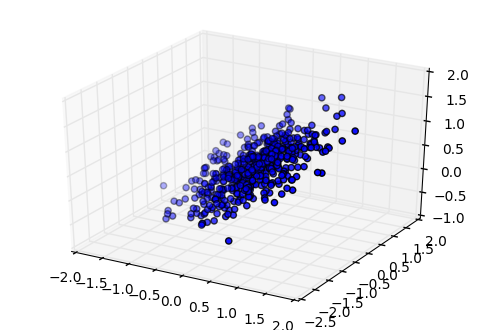

In [5]:
# 세션을 열고 각 훈련마다 loss 함수 값을 출력해 얼마나 loss 값이 출어드는지 확인합니다.
# 훈련이 끝난 후 찾아낸 W 값을 출력해보면, 
# 데이터를 만들기 위해 사용했던 [bias, x1, x2]: [0.3, 0.5, 0.5] 행렬과
# 유사한 값을 찾았음을 확인할 수 있습니다. 
# 해당 값으로 그래프를 그려보면 비슷한 분포를 보임을 확인할 수 있습니다.
with tf.Session() as sess:
    init = tf.initialize_all_variables()
    sess.run(init)
    
    for step in xrange(10):
        sess.run(train)
        print "step: %d, loss: %f" % (step, sess.run(loss))

    print "[bias, x1, x2]: %s" % sess.run(W)
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x_data[1], x_data[2], sess.run(y), label='linear')
    plt.show()